In [ ]:
'''_In this script, we ..._'''

In [ ]:
# -*- coding: utf-8 -*- #
# Authors: gracecaj@stud.ntnu.no, sbaarak@stud.ntnu.no, & annakale@stud.ntnu.no
# Date: 19/09/2023

In [1]:
#%%
#* Import the code needed
import os
import pandas as pd
from pathlib import Path
import numpy as np
import copy
import matplotlib.pyplot as plt
from datetime import datetime
import sys
from scipy.optimize import curve_fit

In [2]:
#%%
#* Define paths
directory_path = Path('../../')

In [12]:
# getting the name of the directory where the this file is present.
current = os.path.dirname(os.path.realpath('this'))
 
# Getting the parent directory name where the current directory is present.
parent = os.path.dirname(current)
#make the UA path
module_path = parent + '/modules'
#append path to options to import from
sys.path.append(module_path)

import natural_cubic_spline_stack_overflow as ncs
import logistic_curve_function as logistic
  


# Import the cleaned and concatenated datasets

In [3]:
historical_PpD = pd.read_excel(
    directory_path / 'data' / 'cleaned_and_combined_data' / 'PpD' / 'historical_PpD.xlsx',
    index_col=0)

# Test Regression types on the historical data, pick the best

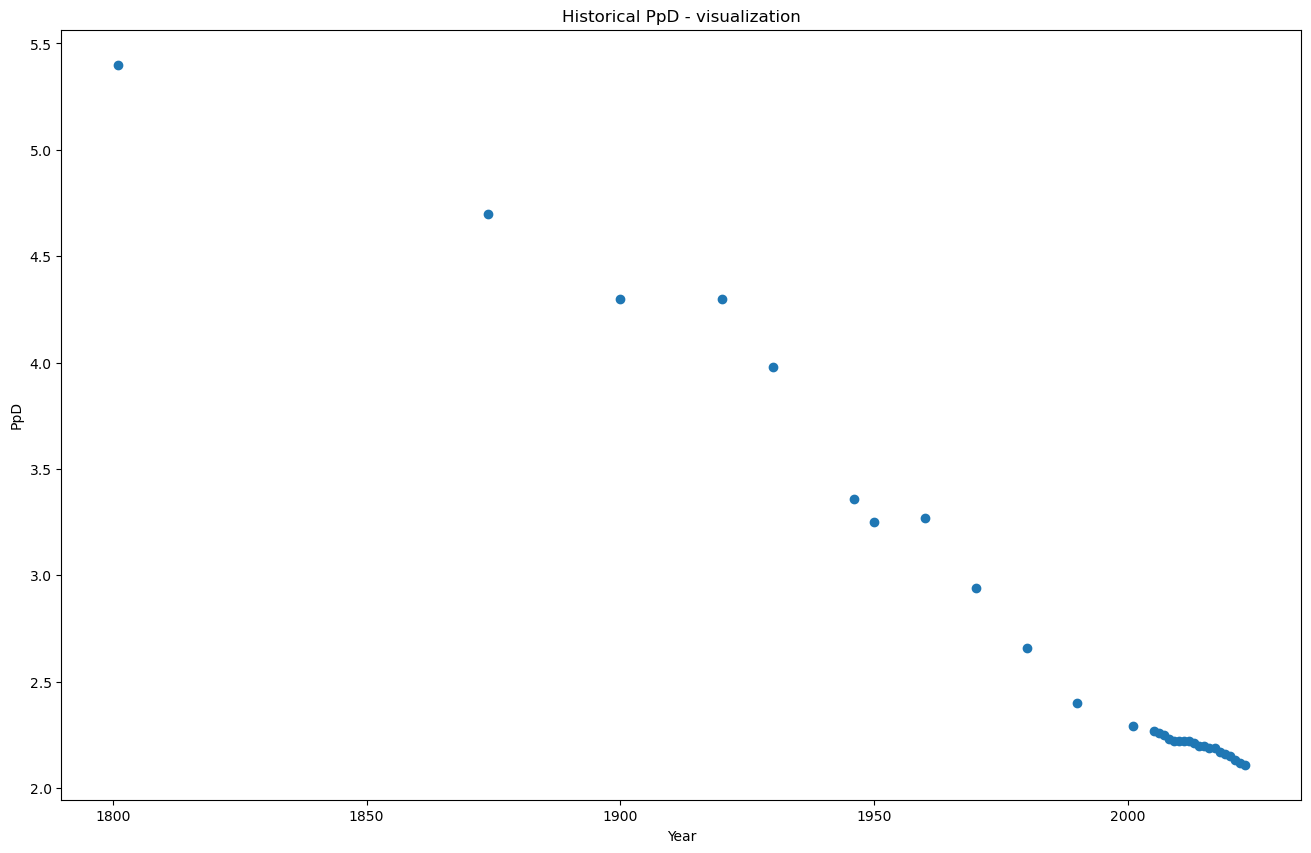

In [13]:
plt.figure(figsize=(16,10))
plt.scatter(historical_PpD.index, historical_PpD['PpD'])
plt.xlabel('Year')
plt.ylabel('PpD')
plt.title('Historical PpD - visualization')
plt.show()

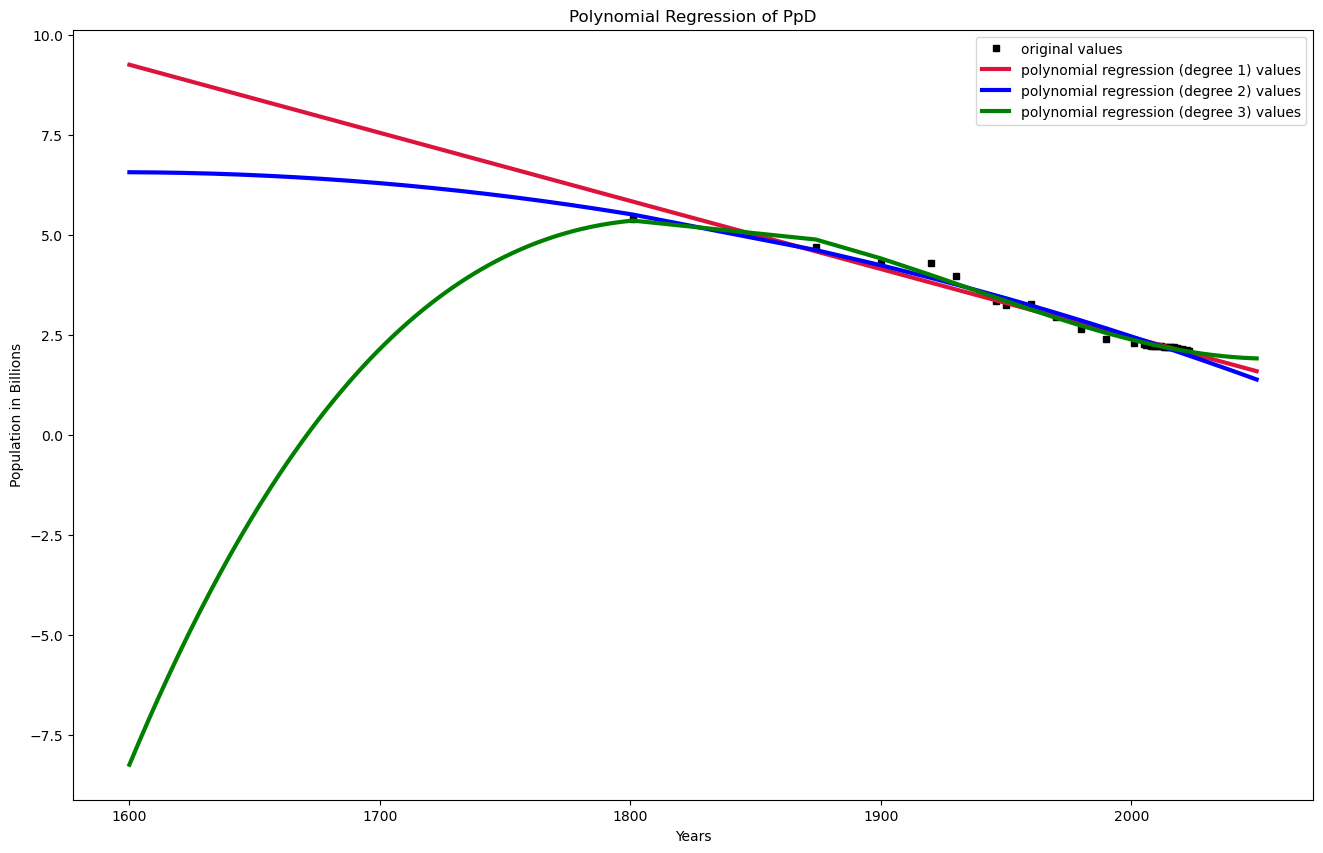

In [50]:
#* Linear Regression of PpD

#the basic values:
oj_years_PpD = historical_PpD.index
oj_values_PpD = historical_PpD['PpD']

#________________________________________________
#create the short data set for the regression

limit_pred = int(len(oj_years_PpD)*1.5) #limit the prediction to 1.5* perc % of the data


reg_predictor_years = oj_years_PpD[0:limit_pred]

#perform regression:
#find beta
linear_model1 = np.poly1d(np.polyfit(oj_years_PpD, oj_values_PpD, 1))
linear_model2 = np.poly1d(np.polyfit(oj_years_PpD, oj_values_PpD, 2))
linear_model3 = np.poly1d(np.polyfit(oj_years_PpD, oj_values_PpD, 3))
#print(f' the linear model our fit created is {linear_model}.')
#apply to extended values
lin_reg_fitted_values1 = linear_model1(reg_predictor_years)
lin_reg_fitted_values2 = linear_model2(reg_predictor_years)
lin_reg_fitted_values3 = linear_model3(reg_predictor_years)
#________________________________________
inputs = oj_years_PpD
outputs = oj_values_PpD

early_years = np.array(np.arange(1600, 1800, 1, dtype=int))
prelim_append = np.append(early_years, oj_years_PpD)
pred_inputs_lin_PpD = np.append(prelim_append, np.arange(2024, 2051, 1, dtype=int))

#perform regression:
#set degreee:
degree1 = 1
degree2 = 2
degree3 = 3
#find polynomial
polynomial1 = np.poly1d(np.polyfit(oj_years_PpD, oj_values_PpD, degree1))
polynomial2 = np.poly1d(np.polyfit(oj_years_PpD, oj_values_PpD, degree2))
polynomial3 = np.poly1d(np.polyfit(oj_years_PpD, oj_values_PpD, degree3))
#print(f' the polynomial our fit created is: \n{polynomial}.')
#apply to extended values
pred_outputs_lin1_PpD = polynomial1(pred_inputs_lin_PpD)
pred_outputs_lin2_PpD = polynomial2(pred_inputs_lin_PpD)
pred_outputs_lin3_PpD = polynomial3(pred_inputs_lin_PpD)
#_________________________________________________________________
plt.figure(figsize=(16,10))
plt.plot(oj_years_PpD, oj_values_PpD, 's', color = 'black', markersize = 5, label = f'original values')
plt.plot(pred_inputs_lin_PpD, pred_outputs_lin1_PpD, color = 'crimson', lw = 3, label = f'polynomial regression (degree {degree1}) values')
plt.plot(pred_inputs_lin_PpD, pred_outputs_lin2_PpD, color = 'blue', lw = 3, label = f'polynomial regression (degree {degree2}) values')
plt.plot(pred_inputs_lin_PpD, pred_outputs_lin3_PpD, color = 'green', lw = 3, label = f'polynomial regression (degree {degree3}) values')
plt.legend(loc = 'best')
#plt.xticks(ticks = np.rint(pred_inputs_p_pop[:limit_pred:int(len(reg_predictor_years)/10)]))
plt.title('Polynomial Regression of PpD')
plt.xlabel('Years')
plt.ylabel('Population in Billions')
plt.show()

In [62]:
early_years = np.array(np.arange(1600, 1800, 1, dtype=int))
prelim_append_1 = np.append(early_years, oj_years_PpD)

missing_years_1 = np.array(np.arange(1802, 1874, 1, dtype=int))
prelim_append_2 = np.append(prelim_append_1, missing_years_1)

missing_years_2 = np.array(np.arange(1901, 1920, 1, dtype=int))
prelim_append_3 = np.append(prelim_append_2, missing_years_2)

missing_years_3 = np.array(np.arange(1921, 1930, 1, dtype=int))
prelim_append_4 = np.append(prelim_append_3, missing_years_3)

missing_years_4 = np.array(np.arange(1931, 1946, 1, dtype=int))
prelim_append_5 = np.append(prelim_append_4, missing_years_4)

missing_years_5 = np.array(np.arange(1947, 1950, 1, dtype=int))
prelim_append_6 = np.append(prelim_append_5, missing_years_5)

missing_years_6 = np.array(np.arange(1951, 1960, 1, dtype=int))
prelim_append_7 = np.append(prelim_append_6, missing_years_6)

missing_years_7 = np.array(np.arange(1961, 1970, 1, dtype=int))
prelim_append_8 = np.append(prelim_append_7, missing_years_7)

missing_years_8 = np.array(np.arange(1971, 1980, 1, dtype=int))
prelim_append_9 = np.append(prelim_append_8, missing_years_8)

missing_years_9 = np.array(np.arange(1981, 1990, 1, dtype=int))
prelim_append_10 = np.append(prelim_append_9, missing_years_9)

missing_years_10 = np.array(np.arange(1991, 2001, 1, dtype=int))
prelim_append_11 = np.append(prelim_append_10, missing_years_10)

missing_years_11 = np.array(np.arange(2002, 2005, 1, dtype=int))
prelim_append_12 = np.append(prelim_append_11, missing_years_11)

pred_inputs_l_PpD = np.append(prelim_append_12, np.arange(2024, 2051, 1, dtype=int))
pred_inputs_l_PpD.sort()
print(pred_inputs_l_PpD)

[1600 1601 1602 1603 1604 1605 1606 1607 1608 1609 1610 1611 1612 1613
 1614 1615 1616 1617 1618 1619 1620 1621 1622 1623 1624 1625 1626 1627
 1628 1629 1630 1631 1632 1633 1634 1635 1636 1637 1638 1639 1640 1641
 1642 1643 1644 1645 1646 1647 1648 1649 1650 1651 1652 1653 1654 1655
 1656 1657 1658 1659 1660 1661 1662 1663 1664 1665 1666 1667 1668 1669
 1670 1671 1672 1673 1674 1675 1676 1677 1678 1679 1680 1681 1682 1683
 1684 1685 1686 1687 1688 1689 1690 1691 1692 1693 1694 1695 1696 1697
 1698 1699 1700 1701 1702 1703 1704 1705 1706 1707 1708 1709 1710 1711
 1712 1713 1714 1715 1716 1717 1718 1719 1720 1721 1722 1723 1724 1725
 1726 1727 1728 1729 1730 1731 1732 1733 1734 1735 1736 1737 1738 1739
 1740 1741 1742 1743 1744 1745 1746 1747 1748 1749 1750 1751 1752 1753
 1754 1755 1756 1757 1758 1759 1760 1761 1762 1763 1764 1765 1766 1767
 1768 1769 1770 1771 1772 1773 1774 1775 1776 1777 1778 1779 1780 1781
 1782 1783 1784 1785 1786 1787 1788 1789 1790 1791 1792 1793 1794 1795
 1796 

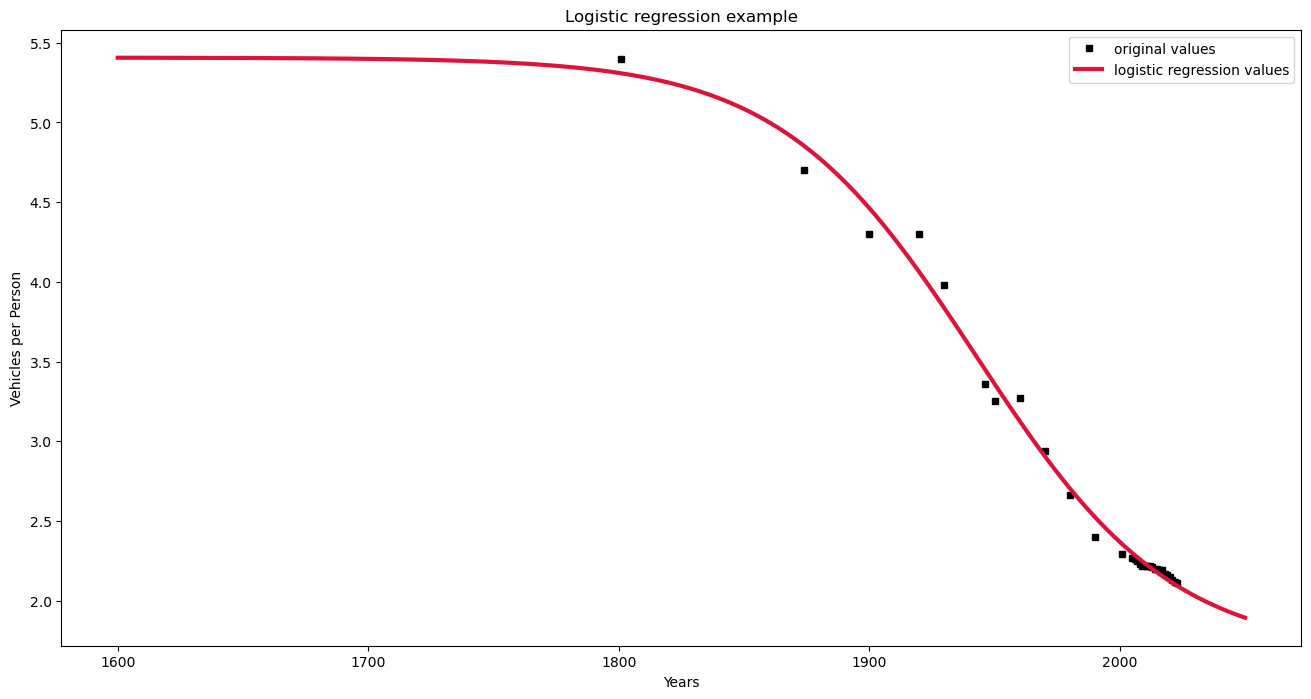

In [67]:
#* Logistic Regression of PpD

oj_years_PpD = historical_PpD.index
oj_values_PpD = historical_PpD['PpD']

#__________________

#___________________________
inputs = oj_years_PpD
outputs = oj_values_PpD

early_years = np.array(np.arange(1600, 1800, 1, dtype=int))
prelim_append_1 = np.append(early_years, oj_years_PpD)

missing_years_1 = np.array(np.arange(1802, 1874, 1, dtype=int))
prelim_append_2 = np.append(prelim_append_1, missing_years_1)

missing_years_2 = np.array(np.arange(1901, 1920, 1, dtype=int))
prelim_append_3 = np.append(prelim_append_2, missing_years_2)

missing_years_3 = np.array(np.arange(1921, 1930, 1, dtype=int))
prelim_append_4 = np.append(prelim_append_3, missing_years_3)

missing_years_4 = np.array(np.arange(1931, 1946, 1, dtype=int))
prelim_append_5 = np.append(prelim_append_4, missing_years_4)

missing_years_5 = np.array(np.arange(1947, 1950, 1, dtype=int))
prelim_append_6 = np.append(prelim_append_5, missing_years_5)

missing_years_6 = np.array(np.arange(1951, 1960, 1, dtype=int))
prelim_append_7 = np.append(prelim_append_6, missing_years_6)

missing_years_7 = np.array(np.arange(1961, 1970, 1, dtype=int))
prelim_append_8 = np.append(prelim_append_7, missing_years_7)

missing_years_8 = np.array(np.arange(1971, 1980, 1, dtype=int))
prelim_append_9 = np.append(prelim_append_8, missing_years_8)

missing_years_9 = np.array(np.arange(1981, 1990, 1, dtype=int))
prelim_append_10 = np.append(prelim_append_9, missing_years_9)

missing_years_10 = np.array(np.arange(1991, 2001, 1, dtype=int))
prelim_append_11 = np.append(prelim_append_10, missing_years_10)

missing_years_11 = np.array(np.arange(2002, 2005, 1, dtype=int))
prelim_append_12 = np.append(prelim_append_11, missing_years_11)

missing_years_12 = np.array(np.arange(1875, 1900, 1, dtype=int))
prelim_append_13 = np.append(prelim_append_12, missing_years_12)

pred_inputs_l_PpD = np.append(prelim_append_13, np.arange(2024, 2051, 1, dtype=int))
pred_inputs_l_PpD.sort()

# it might be necessary to adjust the bounds argument, 
# determining the extreme acceptable value for the parameters of the logistic function.
# Bounds are set as ([low_ti, low_tau, low_Co, low_C1],[high_ti,high_tau, high_Co, high_C1 ])
popt, pcov = curve_fit(logistic.logistic, inputs, outputs, bounds = ([min(inputs), 0, 0, 0], [max(inputs), 10**6, 10**5, 10**6]))
pred_outputs_l_PpD = logistic.logistic(pred_inputs_l_PpD, *popt)

fig=plt.figure(figsize = (16,8))
plt.plot(oj_years_PpD, oj_values_PpD, 's', color = 'black', markersize = 5, label = f'original values')
plt.plot(pred_inputs_l_PpD, pred_outputs_l_PpD, color = 'crimson', lw = 3, label = 'logistic regression values')
plt.legend(loc = 'best')
#plt.xticks(ticks = np.rint(pred_inputs_l_PpD[:limit_pred:int(len(oj_values_PpD)/10)]))
plt.xlabel('Years')
plt.ylabel('Vehicles per Person')
plt.title('Logistic regression example')
plt.show()

The ncs_model


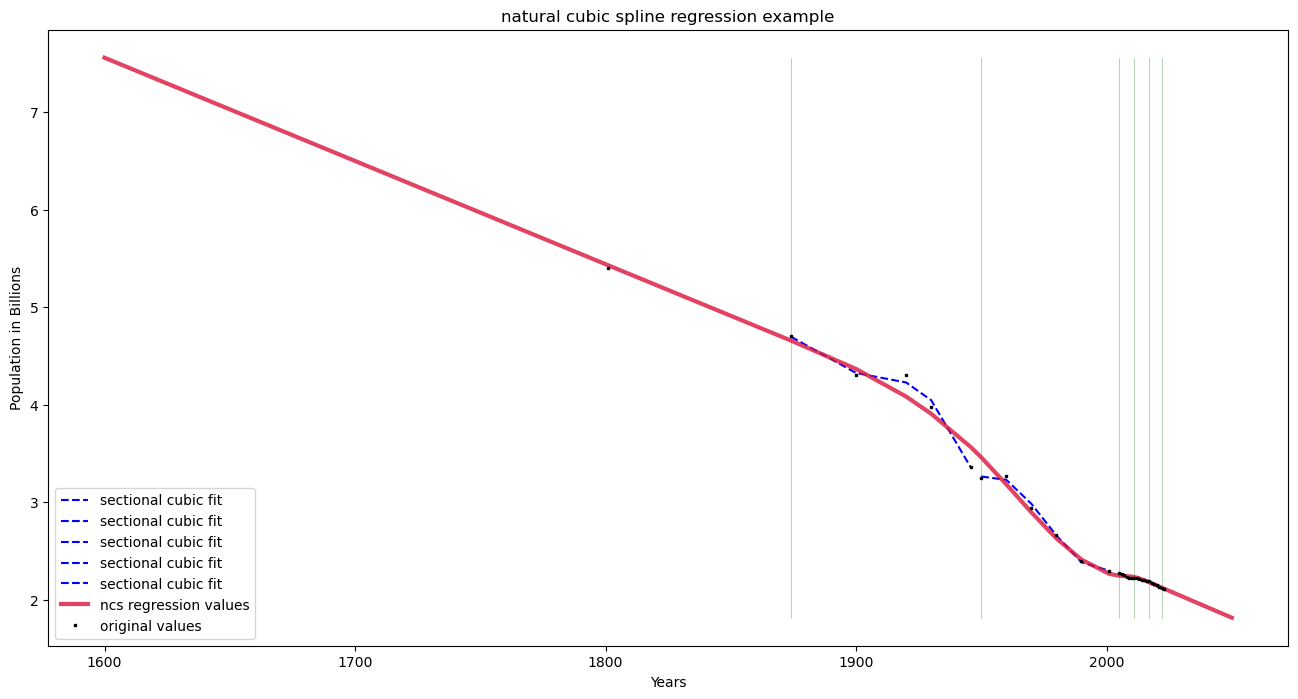

In [47]:
#* NCS Regression of PpD

oj_years_PpD = np.array(historical_PpD.index)
oj_values_PpD = historical_PpD['PpD']


inputs_ncs = oj_years_PpD
outputs_ncs = oj_values_PpD

early_years = np.array(np.arange(1600, 1800, 1, dtype=int))
prelim_append = np.append(early_years, oj_years_PpD)
pred_inputs_ncs_PpD = np.append(prelim_append, np.arange(2024, 2051, 1, dtype=int))

# we can either choose the knots manually, or supply a number of knots
# - see second graphic on top.
# knots at the 2nd and 2nd to last points, and at 20%, 40%, 60% and 80%
knots = [inputs_ncs[1], inputs_ncs[int(0.2*len(inputs_ncs))],inputs_ncs[int(0.4*len(inputs_ncs))],
        inputs_ncs[int(0.6*len(inputs_ncs))], inputs_ncs[int(0.8*len(inputs_ncs))], inputs_ncs[-2]]

# just for showing the different cubic fits
sections = []
for i, knot in enumerate(knots[1:]):
    index_first = np.where(inputs_ncs == knots[i])[0][0]
    index_second = np.where(inputs_ncs == knot)[0][0]
    section_years = inputs_ncs[index_first:index_second]
    section_values = outputs_ncs[index_first:index_second]
    sections.append([section_years, section_values])

# setting up the actual model (training)
ncs_model = ncs.get_natural_cubic_spline_model(inputs_ncs, outputs_ncs, minval=min(inputs_ncs), 
                                               maxval=max(inputs_ncs), knots = knots)
# predicting of the single curve by the model
pred_outputs_ncs_pop = ncs_model.predict(pred_inputs_ncs_PpD)
print(f'The ncs_model')

fig=plt.figure(figsize = (16,8))
#plot the knots:
for knot in knots:
    plt.plot([knot, knot], [min(pred_outputs_ncs_pop), max(pred_outputs_ncs_pop)], lw = 0.5, color = 'darkgreen', 
             alpha = 0.4)

for section in sections:
    [x,y] = section
    polynomial = np.poly1d(np.polyfit(x, y, 3))
    pol_outputs = polynomial(x)
    plt.plot(x, pol_outputs, '--', color = 'blue', lw = 1.5, label = 'sectional cubic fit')

plt.plot(pred_inputs_ncs_PpD, pred_outputs_ncs_pop, color = 'crimson', lw = 3, alpha = 0.8,
         label = 'ncs regression values')
plt.plot(oj_years_PpD, oj_values_PpD, 's', color = 'black', markersize = 2, 
         label = f'original values')
plt.legend(loc = 'best')
#ticks = np.rint(oj_years[:int(len(oj_years)*perc_ncs/100*1.5):int(len(reg_predictor_years)/10)])
#plt.xticks(ticks = ticks)
#plt.xticks(ticks = np.rint(pred_inputs_ncs_pop[:limit_pred:int(len(reg_predictor_years)/10)]))
plt.xlabel('Years')
plt.ylabel('Population in Billions')
plt.title('natural cubic spline regression example')
plt.show()


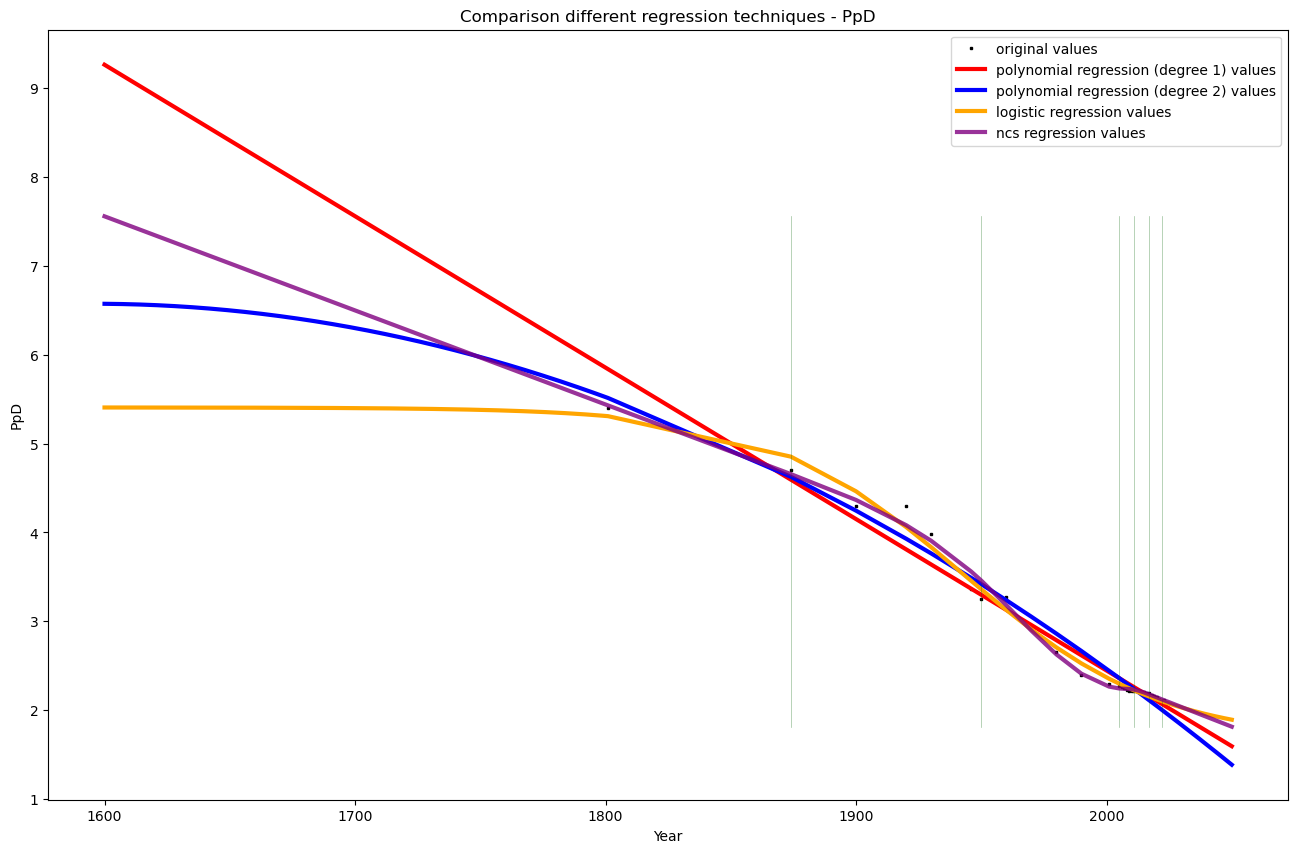

In [53]:
plt.figure(figsize=(16,10))
#add plot and labels here

#Raw data
plt.plot(oj_years_PpD, oj_values_PpD, 's', color = 'black', markersize = 2, 
         label = f'original values')


# Polynomial
plt.plot(pred_inputs_lin_PpD, pred_outputs_lin1_PpD, color = 'red', lw = 3, label = f'polynomial regression (degree {degree1}) values')
plt.plot(pred_inputs_lin_PpD, pred_outputs_lin2_PpD, color = 'blue', lw = 3, label = f'polynomial regression (degree {degree2}) values')
#plt.plot(pred_inputs_lin_PpD, pred_outputs_lin3_PpD, color = 'green', lw = 3, label = f'polynomial regression (degree {degree3}) values')



#Log
plt.plot(pred_inputs_l_PpD, pred_outputs_l_PpD, color = 'orange', lw = 3, label = 'logistic regression values')


#NCS
for knot in knots:
    plt.plot([knot, knot], [min(pred_outputs_ncs_pop), max(pred_outputs_ncs_pop)], lw = 0.5, color = 'darkgreen', 
             alpha = 0.4)

#for section in sections:
 #   [x,y] = section
  #  polynomial = np.poly1d(np.polyfit(x, y, 3))
   # pol_outputs = polynomial(x)
    #plt.plot(x, pol_outputs, '--', color = 'gray', lw = 1.5, label = 'sectional cubic fit')

plt.plot(pred_inputs_ncs_PpD, pred_outputs_ncs_pop, color = 'purple', lw = 3, alpha = 0.8,
         label = 'ncs regression values')
plt.legend(loc = 'best')
plt.xlabel('Year')
plt.ylabel('PpD')
plt.title('Comparison different regression techniques - PpD')
plt.show()

https://history.stackexchange.com/questions/23733/what-was-the-average-size-of-french-families-during-the-middle-ages 

This article makes me think that the logistic curve fits best

In [72]:
#print(pred_inputs_l_PpD)
#print(pred_outputs_l_PpD)

regression_PpD = pd.DataFrame(data=[pred_inputs_l_PpD, pred_outputs_l_PpD]).T

regression_PpD.rename(columns={0: 'Year', 1: 'PpD'}, inplace=True)
regression_PpD.set_index('Year', inplace=True)


#! WE NEED TO RESET THE INDEX TO BE YEAR, GIVE IT INDEX TITLE, SET COLUMN TITLE
print(regression_PpD)


             PpD
Year            
1600.0  5.406318
1601.0  5.406302
1602.0  5.406287
1603.0  5.406270
1604.0  5.406254
...          ...
2046.0  1.915802
2047.0  1.909925
2048.0  1.904177
2049.0  1.898556
2050.0  1.893059

[450 rows x 1 columns]


# Export the regressed parameter data to excel

In [73]:
regression_PpD.to_excel(directory_path / 
                 'data/regression_data/PpD/regression_PpD.xlsx')